<a href="https://colab.research.google.com/github/alexandraxjacobs/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/JACOBS_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [16]:
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [17]:
df['cabin_class']=df['Pclass'].map({1:'first', 2:'second', 3: 'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


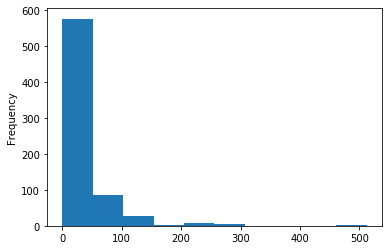

In [18]:
df['Fare'].plot(kind='hist');

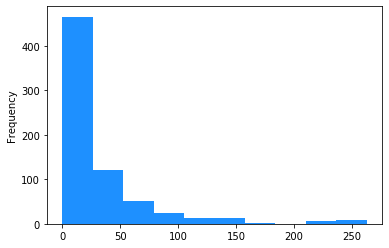

In [19]:
df=df[df['Fare']<500]
df['Fare'].plot(kind='hist',color='dodgerblue');

In [20]:
farebins=[0,8,15,33,512]
farelabels=['low','medium','high','vhigh']
df['fare_groups']=pd.cut(df['Fare'],bins=farebins,labels=farelabels)
myresults = df['fare_groups'].value_counts().sort_index()
myresults

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

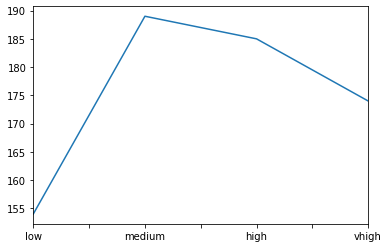

In [21]:
myresults.plot();

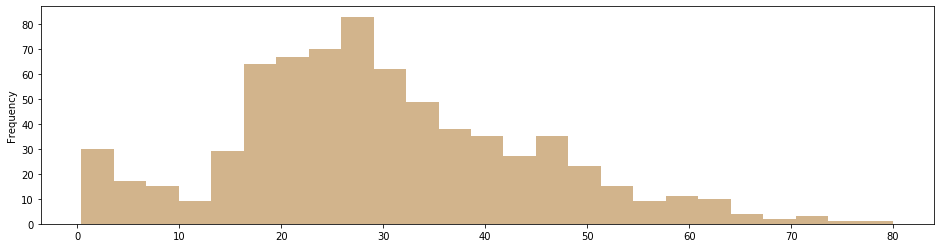

In [22]:
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan');

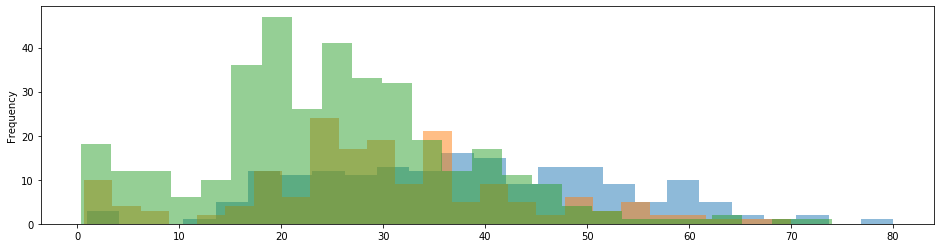

In [23]:
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5);

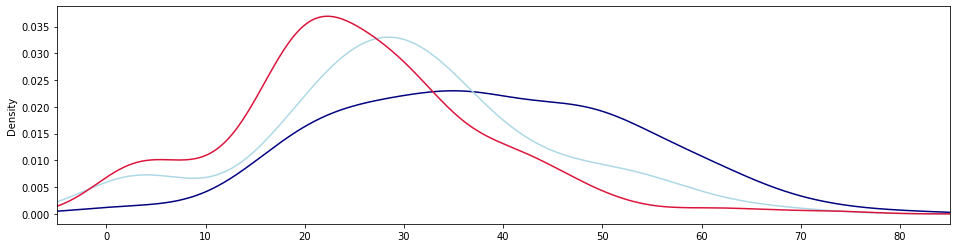

In [24]:
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='navy')
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='lightblue')
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='crimson');

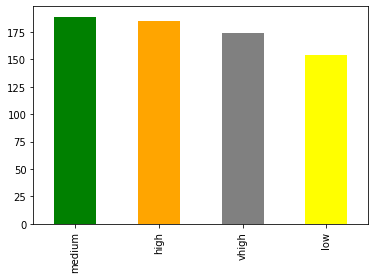

In [25]:
df['fare_groups'].value_counts().plot(kind='bar', color=['green', 'orange', 'grey', 'yellow']);

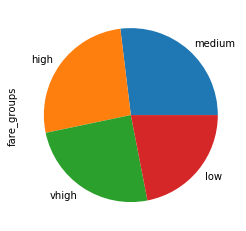

In [26]:
df['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

In [27]:
cab_death = pd.crosstab(df['cabin_class'],df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


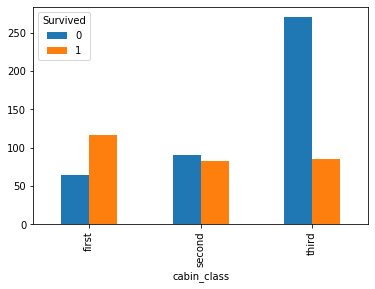

In [28]:
cab_death.plot(kind='bar');

In [29]:
cab_death1 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


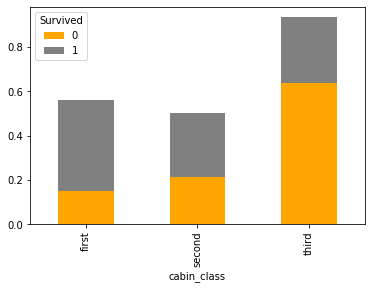

In [30]:
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [31]:
cab_death2 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


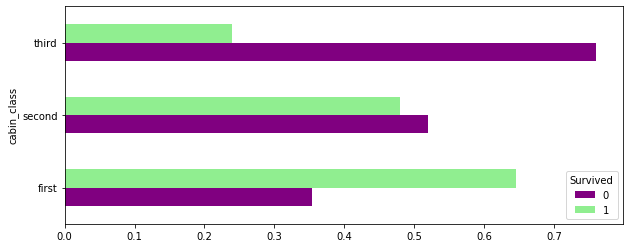

In [32]:
cab_death2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,4));

In [33]:
df['Age'].mean()

29.618011283497882

In [34]:
cab_age = df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

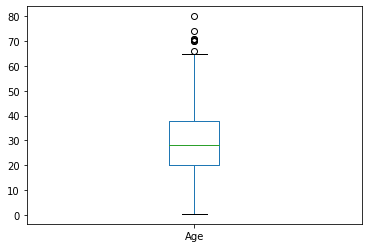

In [35]:
df['Age'].plot(kind='box');

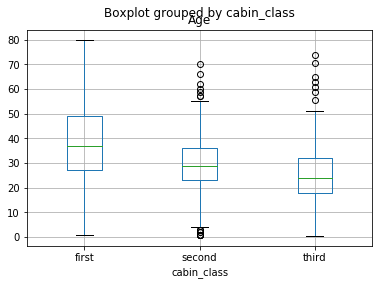

In [36]:
df.boxplot(column='Age', by='cabin_class');

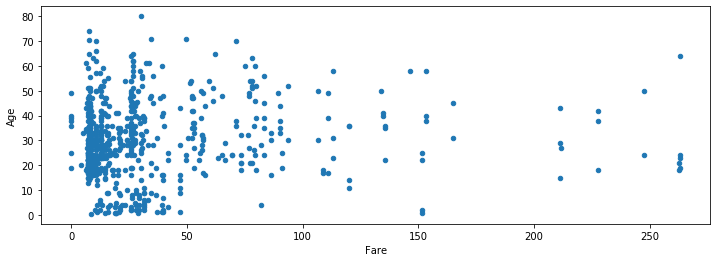

In [37]:
df.plot(kind = 'scatter', x='Fare', y='Age', figsize=(12,4));

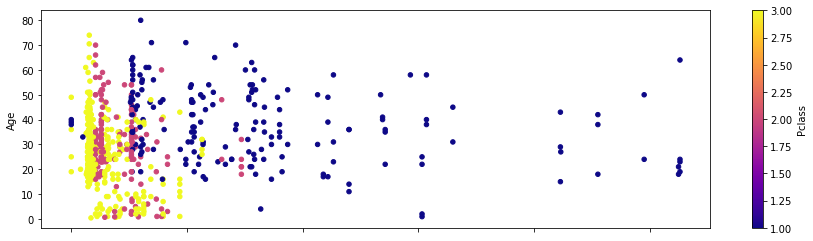

In [38]:
df.plot(kind = 'scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(15,4));

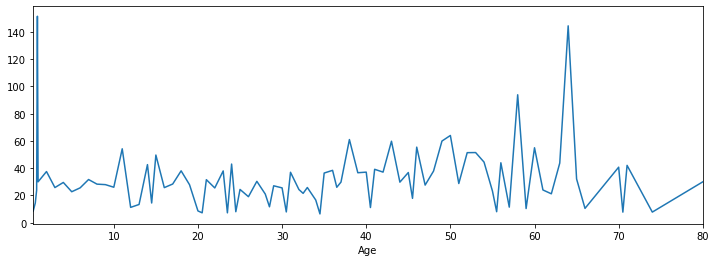

In [39]:
df.groupby('Age')['Fare'].mean().plot(figsize=(12,4));

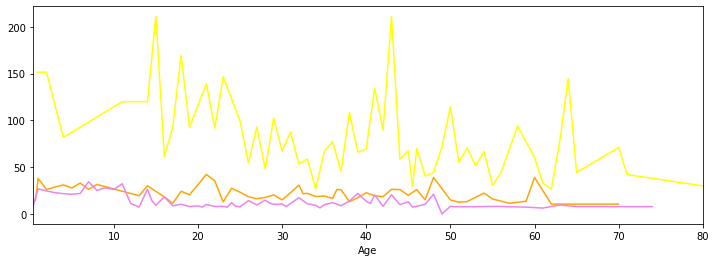

In [40]:
mycolors=['yellow', 'orange', 'violet']
for x in [1,2,3]:
    df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x-1])

In [41]:
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


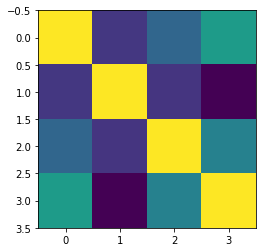

In [42]:
plt.imshow(corr_matrix);

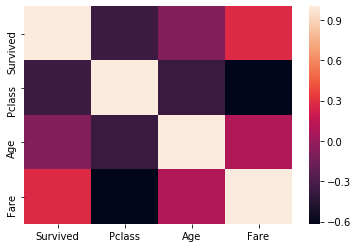

In [43]:
sns.heatmap(corr_matrix);

In [0]:
# intro to matplotlib
import numpy as np
x = np.linspace(0,5,11)
y = x ** 2

In [45]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [46]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

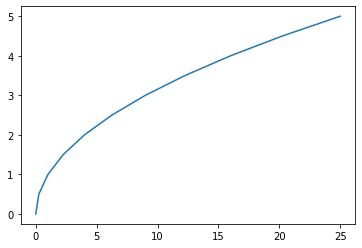

In [47]:
plt.plot(y,x);

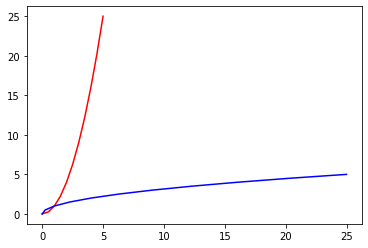

In [48]:
#what do r and b represent?
plt.plot(x,y,'r')
plt.plot(y,x,'b')

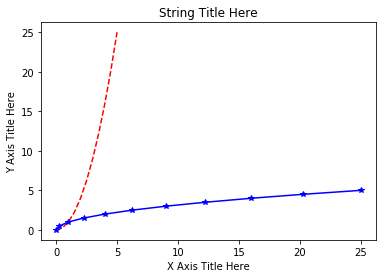

In [49]:
plt.plot(x, y, 'r--') 
plt.plot(y, x, 'b*-')
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here');

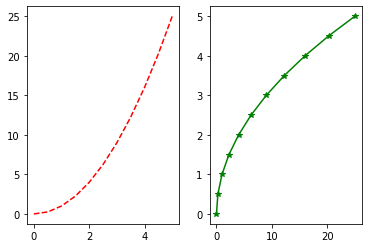

In [50]:
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

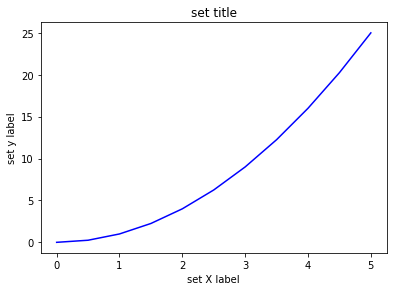

In [51]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(x, y, 'b')
axes.set_xlabel('set X label') 
axes.set_ylabel('set y label')
axes.set_title('set title');

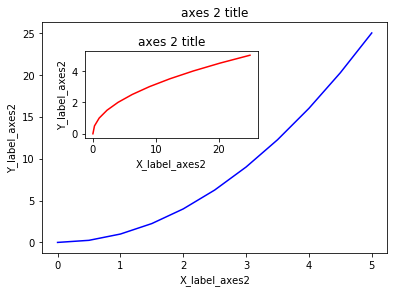

In [52]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('axes 2 title')

axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('axes 2 title');

In [0]:
axes.plot(x, y, 'green')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

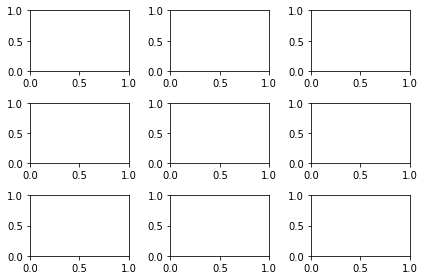

In [60]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig    
plt.tight_layout()

In [65]:
axes

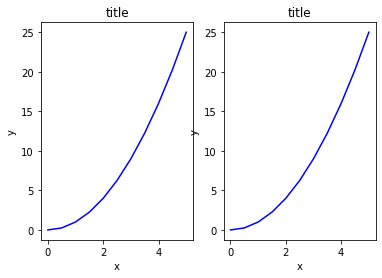

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

In [70]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

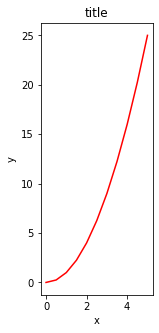

In [69]:

fig, axes = plt.subplots(figsize=(2,5))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

In [0]:
fig.savefig("filename.png")

In [0]:
fig.savefig("filename.jpg", dpi=200)

In [0]:
ax.set_title("title");

In [0]:
ax.set_xlabel("x")
ax.set_ylabel("y");

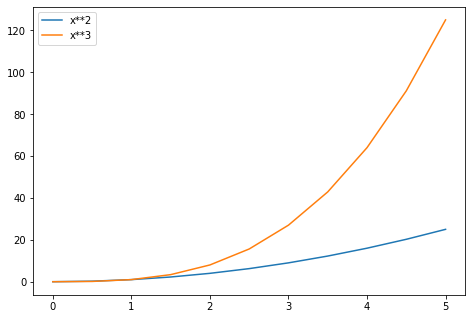

In [77]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax
ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend();

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


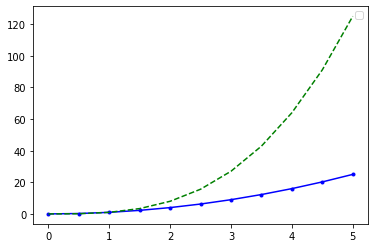

In [79]:
ax.legend(loc=1) # up right
ax.legend(loc=2) # up left
ax.legend(loc=3) # low left
ax.legend(loc=4) # low righy

ax.legend()
fig

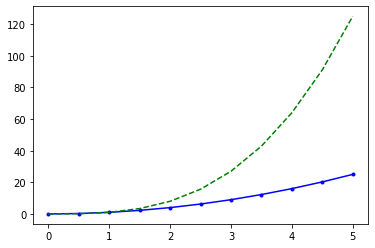

In [78]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-')
ax.plot(x, x**3, 'g--')

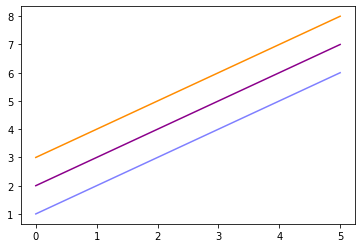

In [80]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5)
ax.plot(x, x+2, color="#8B008B")
ax.plot(x, x+3, color="#FF8C00")

In [0]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

In [82]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/features/what-do-men-think-it-means-to-be-a-man/'
example = Image(url=url, width=400)
display(example)

In [83]:
print(plt.style.available[:5])
plt.style.use('fivethirtyeight')

['tableau-colorblind10', 'seaborn-muted', 'seaborn', 'dark_background', 'grayscale']


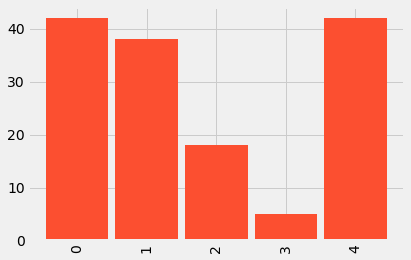

In [84]:
fake = pd.Series([42,38,18,5,42]),
index = range 1,6
fake.plot.bar(color='C1', width=0.9);

[Text(0, 0, 'Greater risk of being accused of sexual harassment'),
 Text(0, 0, 'Greater risk of being accused of being sexist or racist'),
 Text(0, 0, 'Managers want to hire and promote women'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'None of the above')]

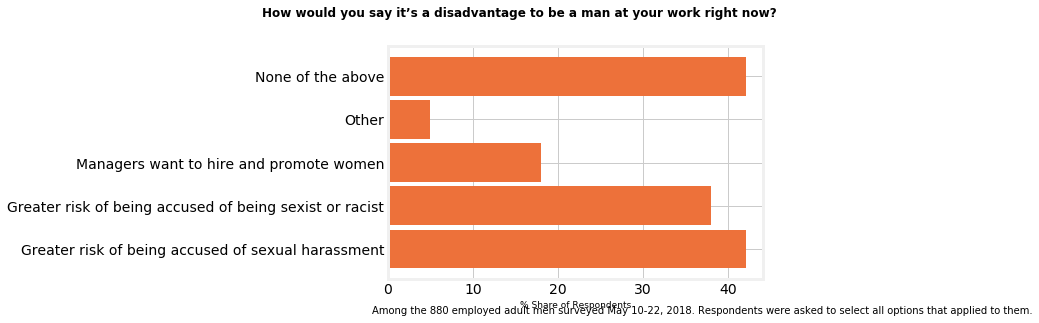

In [183]:
import numpy as np
fig, ax = plt.subplots()
fig.patch.set(facecolor = "white")
ax.patch.set(facecolor="white")
ax.set_title("How would you say it’s a disadvantage to be a man at your work right now?",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
fake.plot.barh(width=0.9, color="#ED713A")
ax.text (s="Among the 880 employed adult men surveyed May 10-22, 2018. Respondents were asked to select all options that applied to them.", 
         fontsize=10, x=-1.85, y=-1.5);
ax.set_xlabel("% Share of Respondents", fontsize=9)
ax.set_xticklabels(range(0,50,10));
ax.set_yticklabels(['Greater risk of being accused of sexual harassment','Greater risk of being accused of being sexist or racist','Managers want to hire and promote women', 'Other', 'None of the above',])


In [114]:

##ALL OF THE BELOW HAS BEEN STRIKED OUT SINCE I HIT A WALL.
##df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv')
##df.head

<bound method NDFrame.head of       Unnamed: 0     StartDate  ...   orientation    weight
0              1  5/10/18 4:01  ...  Gay/Bisexual  1.714026
1              2  5/10/18 6:30  ...      Straight  1.247120
2              3  5/10/18 7:02  ...      Straight  0.515746
3              4  5/10/18 7:27  ...     No answer  0.600640
4              5  5/10/18 7:35  ...      Straight  1.033400
...          ...           ...  ...           ...       ...
1610        1611  5/22/18 8:48  ...      Straight  2.891038
1611        1612  5/22/18 9:15  ...      Straight  8.643674
1612        1613  5/22/18 9:22  ...      Straight  2.340241
1613        1614  5/22/18 9:44  ...      Straight  6.557984
1614        1615  5/22/18 9:55  ...      Straight  2.817560

[1615 rows x 98 columns]>

In [0]:
#df['StartDate'] = pd.to_datetime(df['StartDate'])

In [0]:
#df.set_index('StartDate', inplace=True)

In [0]:
#lastday = df['5/22/18']

In [120]:
##lastday_filtered = lastday[lastday['orientation'] == 'Straight']
##lastday_filtered.tail()

,Unnamed: 0,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,...,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
StartDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-05-22 08:48:00,1611,5/22/18 8:52,Not very masculine,Not at all important,Father or father figure(s),Mother or mother figure(s),Other family members,Pop culture,Friends,Not selected,Yes,Rarely,Sometimes,"Never, and not open to it",Rarely,"Never, and not open to it","Never, but open to it","Never, and not open to it","Never, and not open to it",Sometimes,"Never, but open to it",Sometimes,Not selected,Not selected,Your hair or hairline,Your physique,Appearance of your genitalia,Not selected,Not selected,Your mental health,Your physical health,"Your finances, including your current or futur...",Not selected,Not selected,"Employed, working full-time",Men make more money,Men are taken more seriously,Men have more choice,Men have more promotion/professional developme...,Men are explicitly praised more often,...,Yes,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not selected,Not selected,Not selected,Not selected,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Straight,White,Some college,Missouri,"$10,000-$24,999",West North Central,iOS Phone / Tablet,White,White,Some college,Some college,18 - 34,No children,Straight,2.891038
2018-05-22 09:15:00,1612,5/22/18 9:24,Very masculine,Very important,Father or father figure(s),Not selected,Other family members,Not selected,Not selected,Not selected,Yes,Often,Often,Sometimes,"Never, but open to it",Rarely,Often,"Never, and not open to it",Often,Sometimes,"Never, but open to it",Sometimes,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Your mental health,Not selected,"Your finances, including your current or futur...","Your ability to provide for your family, curre...",Not selected,"Employed, working full-time",Men make more money,Not selected,Men have more choice,Not selected,Not selected,...,Yes,Yes,Always,It?s the right thing to do,Not selected,You feel good about being the one who pays,Not selected,"You asked the person out, so you feel obligate...",Not selected,Not selected,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Not selected,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Married,"Yes, one or more children under 18",Not selected,Not selected,Straight,Hispanic,Did not complete high school,Colorado,"$50,000-$74,999",NaN,iOS Phone / Tablet,Non-white,Hispanic,High school or less,High school or less,35 - 64,Has children,Straight,8.643674
2018-05-22 09:22:00,1613,5/22/18 9:39,Somewhat masculine,Somewhat important,Not selected,Mother or mother figure(s),Not selected,Not selected,Not selected,Not selected,Yes,No answer,Often,Often,Rarely,Rarely,Often,"Never, and not open to it",Often,Sometimes,Rarely,Rarely,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Sexual performance or amount of sex,Not selected,Your physical health,"Your finances, including your current or futur...","Your ability to provide for your fa

In [145]:
##import pandas as pd
##gk = df.groupby('q0010_0005')
##gk.first()

,Unnamed: 0,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0006,...,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
q0010_0005,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Men are explicitly praised more often,47,5/11/18 6:11,Not very masculine,Not too important,Not selected,Mother or mother figure(s),Not selected,Not selected,Not selected,Not selected,Yes,Often,Often,Sometimes,Often,Rarely,Often,"Never, and not open to it",Sometimes,Sometimes,Often,Sometimes,Your height,Your weight,Your hair or hairline,Not selected,Appearance of your genitalia,Not selected,Sexual performance or amount of sex,Your mental health,Your physical health,Not selected,"Your ability to provide for your family, curre...",Not selected,"Employed, working full-time",Men make more money,Not selected,Not selected,Men have more promotion/professional developme...,Not selected,...,Yes,Yes,Often,Not selected,Not selected,Not selected,"Societal expectations, even though you don?t a...","You asked the person out, so you feel obligate...",You try to pay to see if the other person will...,Not selected,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,No,Married,"Yes, one or more children under 18",Not selected,Not selected,Straight,White,Post graduate degree,Michigan,"$50,000-$74,999",East North Central,Android Phone / Tablet,White,White,College or more,Post graduate degree,18 - 34,Has children,Straight,0.125881
Not selected,3,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,Not selected,Not selected,Not selected,"Employed, working full-time",Not selected,Not selected,Not selected,Not selected,Not selected,...,No,Yes,Sometimes,Not selected,Not selected,Not selected,"Societal expectations, even though you don?t a...",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Every situation is different,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,No,Married,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,College graduate,Michigan,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746


In [123]:
#Help!  There isn't much numeric data here...
#final = lastday_filtered.tail(1)
#final.T

StartDate,2018-05-22 09:55:00
Unnamed: 0,1615
EndDate,5/22/18 10:00
q0001,Very masculine
q0002,Not at all important
q0004_0001,Father or father figure(s)
...,...
educ4,Some college
age3,18 - 34
kids,No children
orientation,Straight


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here